In [1]:
# Load all the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Turning off the warnings in ML
pd.options.mode.chained_assignment=None

In [3]:
# Loading and reading of dataset
classified_df = pd.read_csv('Classified Data.bin', index_col=0)

In [4]:
# Shape of the data
print('Number of rows: ',classified_df.shape[0])
print('Number of columns: ',classified_df.shape[1])

Number of rows:  1000
Number of columns:  11


In [5]:
# Viewing the whole data
classified_df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1
...,...,...,...,...,...,...,...,...,...,...,...
995,1.010953,1.034006,0.853116,0.622460,1.036610,0.586240,0.746811,0.319752,1.117340,1.348517,1
996,0.575529,0.955786,0.941835,0.792882,1.414277,1.269540,1.055928,0.713193,0.958684,1.663489,0
997,1.135470,0.982462,0.781905,0.916738,0.901031,0.884738,0.386802,0.389584,0.919191,1.385504,1
998,1.084894,0.861769,0.407158,0.665696,1.608612,0.943859,0.855806,1.061338,1.277456,1.188063,1


In [6]:
# Info
classified_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [7]:
# Describe
classified_df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


In [8]:
# Columns
classified_df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

# Exploratory Analysis

In [9]:
# Data Visualization
sns.set_palette('GnBu_r')
sns.set_style('whitegrid')

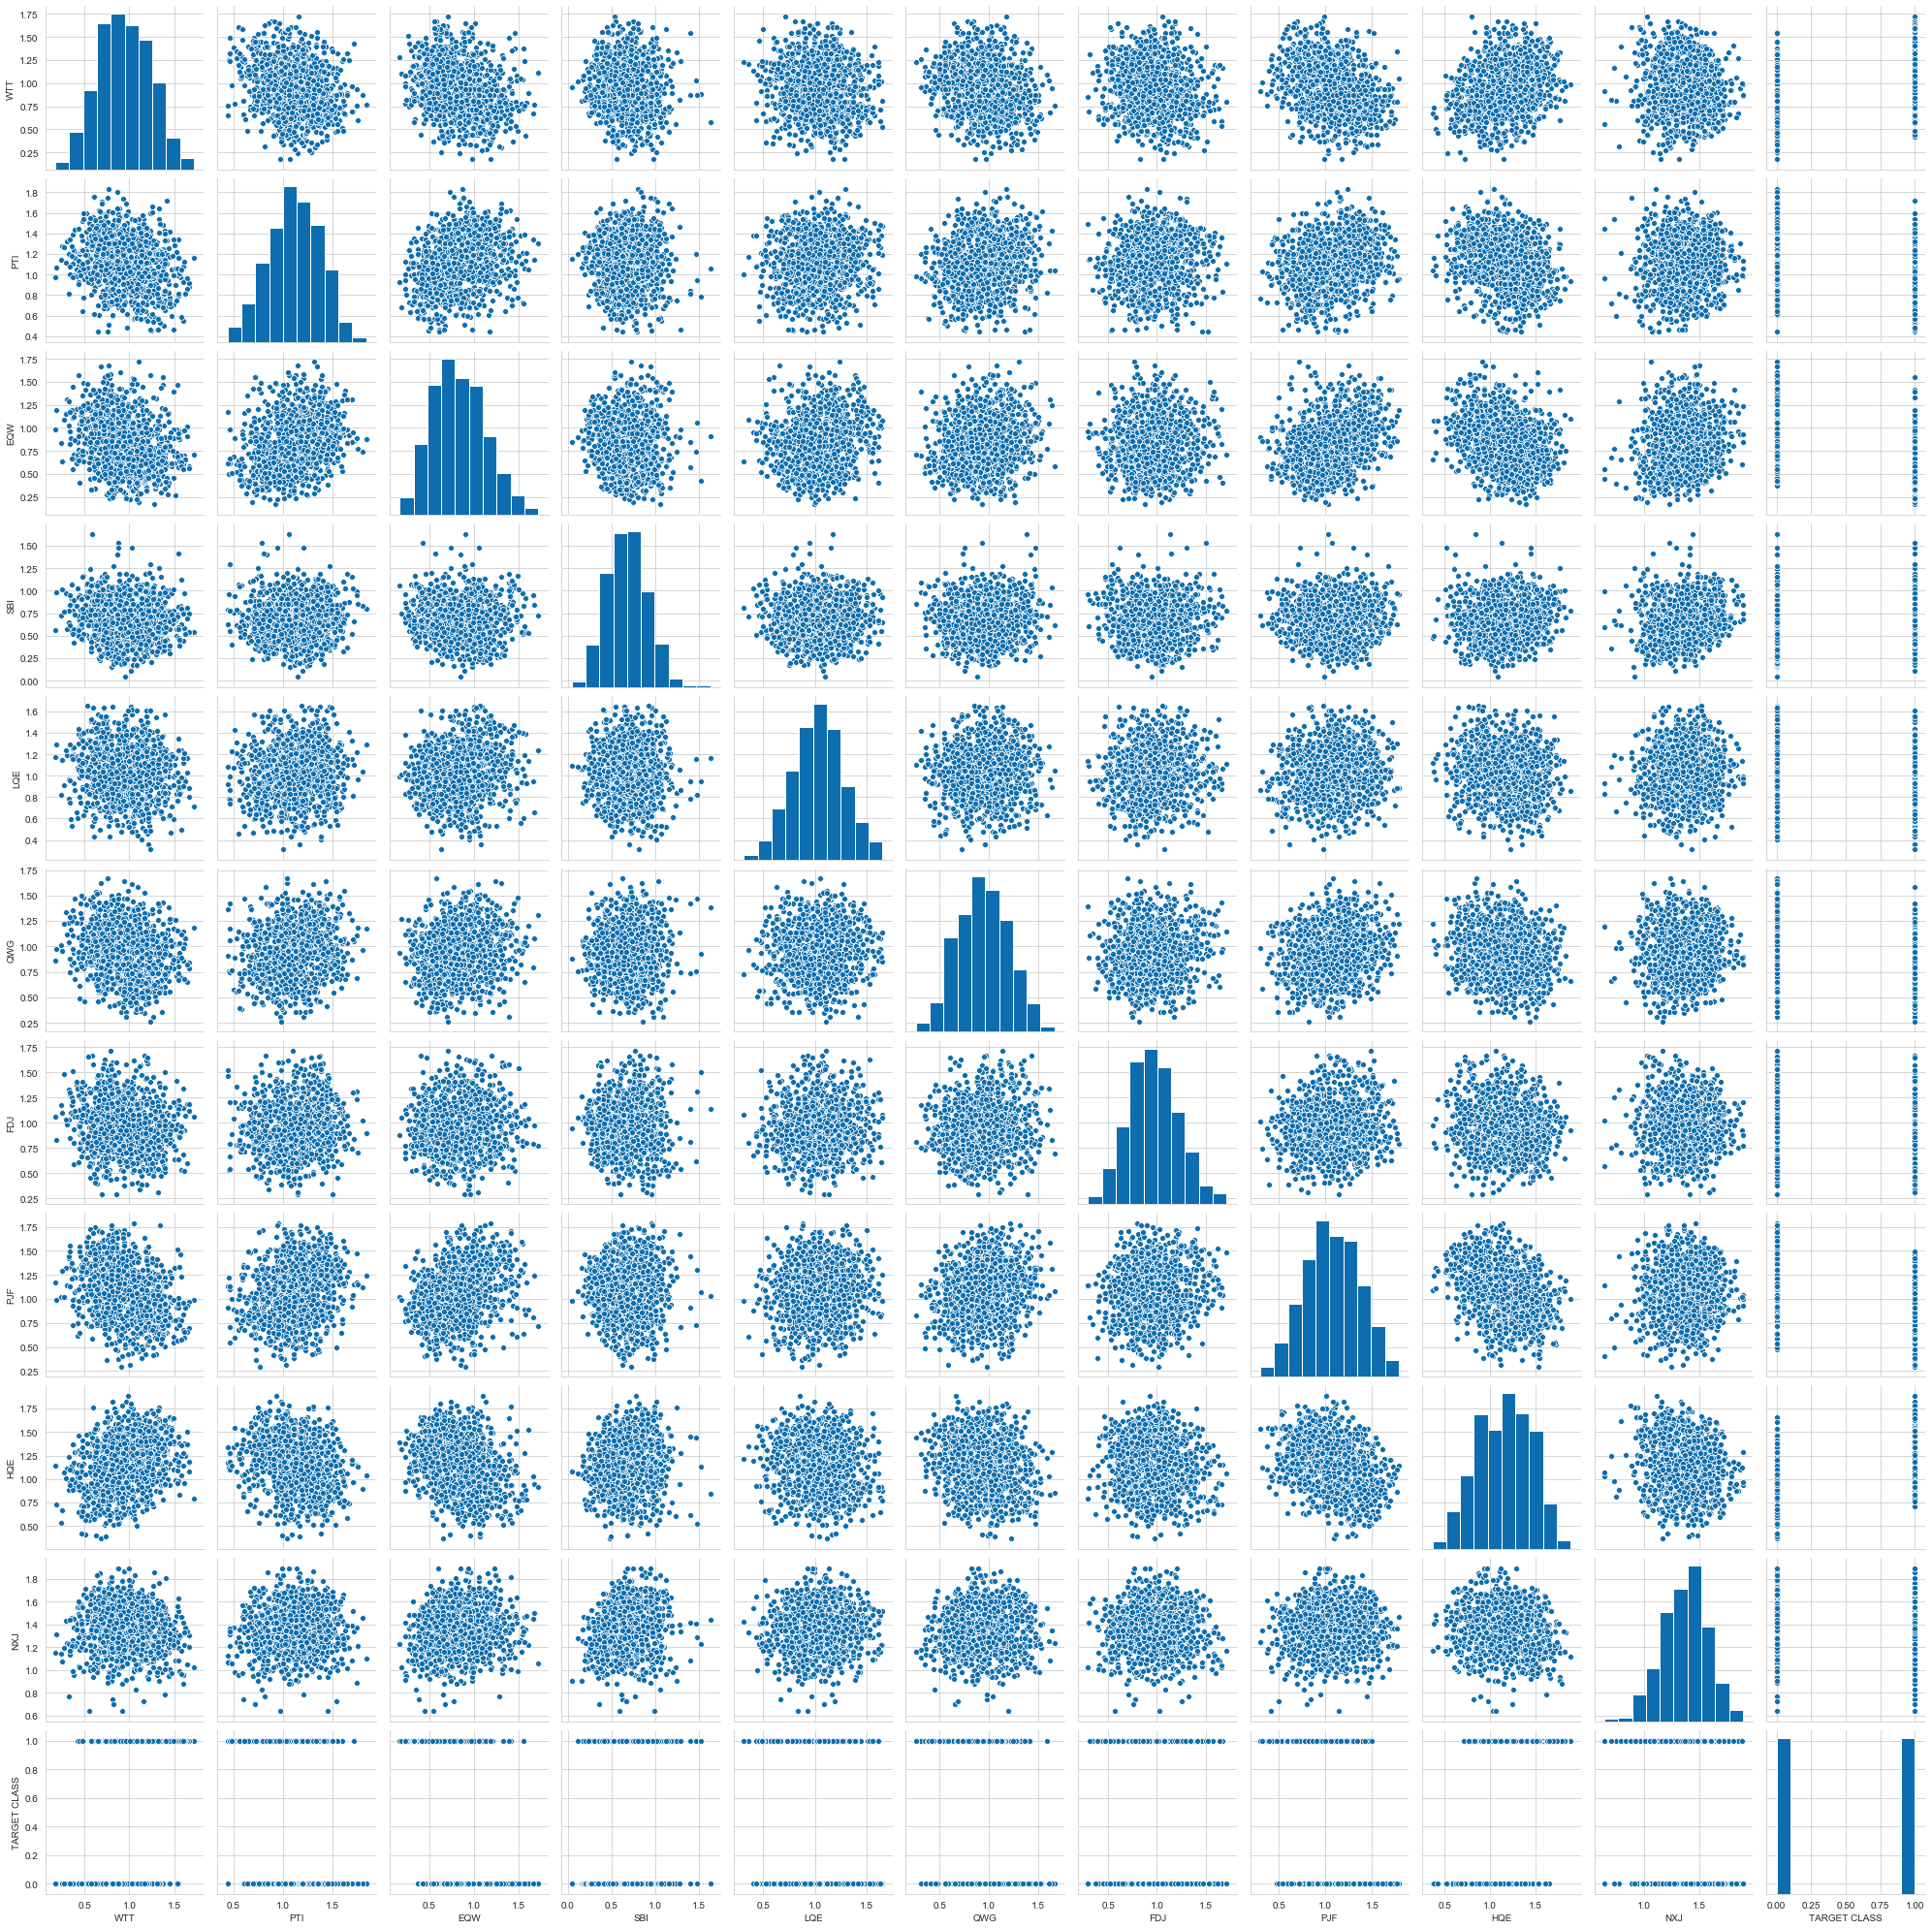

In [10]:
# Pair Plot
sns.pairplot(classified_df)

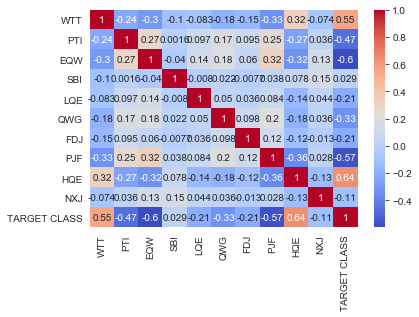

In [15]:
# Heat Map
sns.heatmap(classified_df.corr(), annot=True, cmap='coolwarm')

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(classified_df.drop('TARGET CLASS', axis=1))
rescaledx = scaler.transform(classified_df.drop('TARGET CLASS', axis=1))
classified_df_feature = pd.DataFrame(rescaledx, columns=classified_df.columns[:-1])

In [16]:
# Splitting of X and y
X = classified_df_feature
y = classified_df['TARGET CLASS']

In [19]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [24]:
# Shapes of the train and test variable
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 10)
(300, 10)
(700,)
(300,)


In [27]:
# Create and train model(X_train, y_train) {n_neighbors=1}
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [30]:
# Checking for various accuracy for KNeighborsClassifier
print('KNN accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('')

classification = metrics.classification_report(y_test, y_pred)
print('Classification Report')
print(classification)
print('')

confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

KNN accuracy:  0.9233333333333333

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       159
           1       0.94      0.89      0.92       141

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300


Confusion Matrix:
[[151   8]
 [ 15 126]]


In [33]:
k_range = range(1, 40)
error_rate = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred2 = knn.predict(X_test)
    error_rate.append(np.mean(y_pred2 != y_test))

In [34]:
error_rate

[0.07666666666666666,
 0.09,
 0.05,
 0.07,
 0.056666666666666664,
 0.05,
 0.06666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.05333333333333334,
 0.04666666666666667,
 0.05,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.05,
 0.05333333333333334,
 0.05,
 0.05,
 0.06333333333333334,
 0.056666666666666664,
 0.056666666666666664,
 0.05,
 0.05,
 0.04666666666666667,
 0.06,
 0.05,
 0.056666666666666664,
 0.04666666666666667,
 0.05333333333333334,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.04666666666666667,
 0.043333333333333335,
 0.05]

Text(0, 0.5, 'Error Rate')

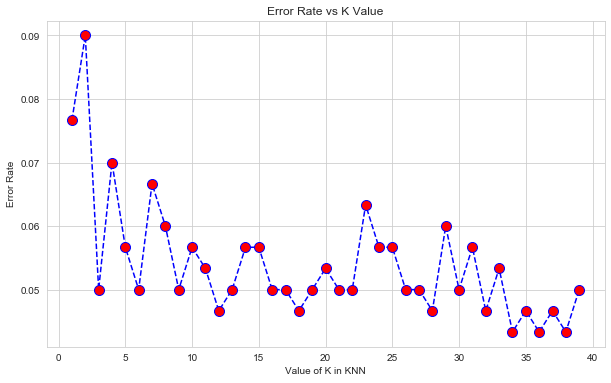

In [36]:
# plot the relationship between K and testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('Value of K in KNN')
plt.ylabel('Error Rate')

In [37]:
# Trying to Create and train another model(X_train, y_train) {n_neighbors=35}
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [38]:
# Checking for various accuracy for KNeighborsClassifier
print('KNN accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('')

classification = metrics.classification_report(y_test, y_pred)
print('Classification Report')
print(classification)
print('')

confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

KNN accuracy:  0.9533333333333334

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.95      0.95      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


Confusion Matrix:
[[152   7]
 [  7 134]]


In [40]:
# Trying to Create and train another model(X_train, y_train) {n_neighbors=37}
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=37)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [41]:
# Checking for various accuracy for KNeighborsClassifier
print('KNN accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('')

classification = metrics.classification_report(y_test, y_pred)
print('Classification Report')
print(classification)
print('')

confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

KNN accuracy:  0.9533333333333334

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       159
           1       0.95      0.95      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


Confusion Matrix:
[[152   7]
 [  7 134]]


In [42]:
# Trying to Create and train another model(X_train, y_train) {n_neighbors=39}
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [43]:
# Checking for various accuracy for KNeighborsClassifier
print('KNN accuracy: ',metrics.accuracy_score(y_test, y_pred))
print('')

classification = metrics.classification_report(y_test, y_pred)
print('Classification Report')
print(classification)
print('')

confusion = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(confusion)

KNN accuracy:  0.95

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       159
           1       0.94      0.95      0.95       141

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300


Confusion Matrix:
[[151   8]
 [  7 134]]
